In [3]:
import argparse
import psycopg2
import numpy as np
import sys

In [22]:
# get_medians.py
import sys
import psycopg2
import numpy as np
import argparse


# Define the file name for the output
output_filename = "median_price.txt" 

# Define your argument list as a list of strings
# Eg: args_list = args_list = ["--postcode", "your_postcode", "-m"] Replace "your_postcode" and add argument
# args_list = args_list = ["--city", "London", "-m"]

args_list = ["--city", "London", "-m"]

# Define a function to parse arguments from a list
def parse_arguments(arguments):
    parser = argparse.ArgumentParser(description='Return median house prices over time given some constraints.')
    parser.add_argument('--postcode', type=str, help='Postcode or initial fragment of a postcode')
    parser.add_argument('--paon', type=str, help='Primary addressable object name, e.g. house number')
    parser.add_argument('--town', type=str, dest='town_city', help='Town or city name')
    parser.add_argument('--city', type=str, dest='town_city', help='Town or city name')
    timeframe = parser.add_mutually_exclusive_group()
    timeframe.add_argument('-y', action='store_true', default=True, help='Calculate median within each year')
    timeframe.add_argument('-m', action='store_true', default=False, help='Calculate median within each month')

    return parser.parse_args(arguments)

# Parse the provided arguments
constraints = parse_arguments(args_list)

sql_constraints = ['']
if constraints.paon:
    sql_constraints.append("paon='{0:s}'".format(constraints.paon))
if constraints.town_city:
    sql_constraints.append("town_city='{0:s}'".format(
                       constraints.town_city.upper()))
if constraints.postcode:
    sql_constraints.append("postcode LIKE '{:s}%'".format(constraints.postcode))
sql_constraints = ' AND '.join(sql_constraints)

def increment_month(year, month):
    """Increment the date given by year, month by one month."""
    month += 1
    if month == 13:
        year, month = year + 1, 1
    return year, month

def increment_year(year, month):
    """Increment the date given by year, month by one year."""
    year += 1
    return year, month

# Select the required time interval increment function (+1 month or +1 year)
#increment_time_interval = increment_year or increment_time_interval = increment_month
if constraints.m:
    increment_time_interval = increment_year

conn = psycopg2.connect(database='house_prices', user='postgres',
                        password='Kirt')
cursor = conn.cursor()

end_year, end_month = 2023, 1
year1, month1 = 1995, 1

with open(output_filename, "w") as output_file:
    while (year1, month1) != (end_year, end_month):
        year2, month2 = increment_time_interval(year1, month1)
        date_start = '{0:4d}-{1:02d}-01'.format(year1, month1)
        date_end = '{0:4d}-{1:02d}-01'.format(year2, month2)
        query = "SELECT price from pp WHERE date_of_transfer >= '{0:s}' AND"\
                " date_of_transfer < '{1:s}'{2:s}".format(
                        date_start, date_end, sql_constraints)

        cursor.execute(query)
        prices = np.array(cursor.fetchall())
        median_price = np.median(prices)

        output_file.write('{0:s} {1:s} {2:d} {3:.2f}\n'.format(city, date_start, len(prices), median_price))
        print('{0:s} {1:s} {2:d} {3:.2f}'.format(city, date_start, len(prices), median_price))

        year1, month1 = year2, month2
    

London 1995-01-01 189957 75500.00
London 1996-01-01 183009 78500.00
London 1997-01-01 187756 93000.00
London 1998-01-01 179156 107000.00
London 1999-01-01 208924 130000.00
London 2000-01-01 166426 155000.00
London 2001-01-01 99003 170000.00
London 2002-01-01 103738 199497.00
London 2003-01-01 87195 214000.00
London 2004-01-01 93916 232500.00
London 2005-01-01 82954 244000.00
London 2006-01-01 103171 250000.00
London 2007-01-01 97774 290000.00
London 2008-01-01 47772 290000.00
London 2009-01-01 45068 300000.00
London 2010-01-01 56569 330000.00
London 2011-01-01 56072 335000.00
London 2012-01-01 58133 344500.00
London 2013-01-01 71182 375000.00
London 2014-01-01 78170 425000.00
London 2015-01-01 77195 460000.00
London 2016-01-01 73759 499999.00
London 2017-01-01 71012 515000.00
London 2018-01-01 67065 505000.00
London 2019-01-01 64471 520000.00
London 2020-01-01 58823 550000.00
London 2021-01-01 82016 554000.00
London 2022-01-01 62534 580000.00


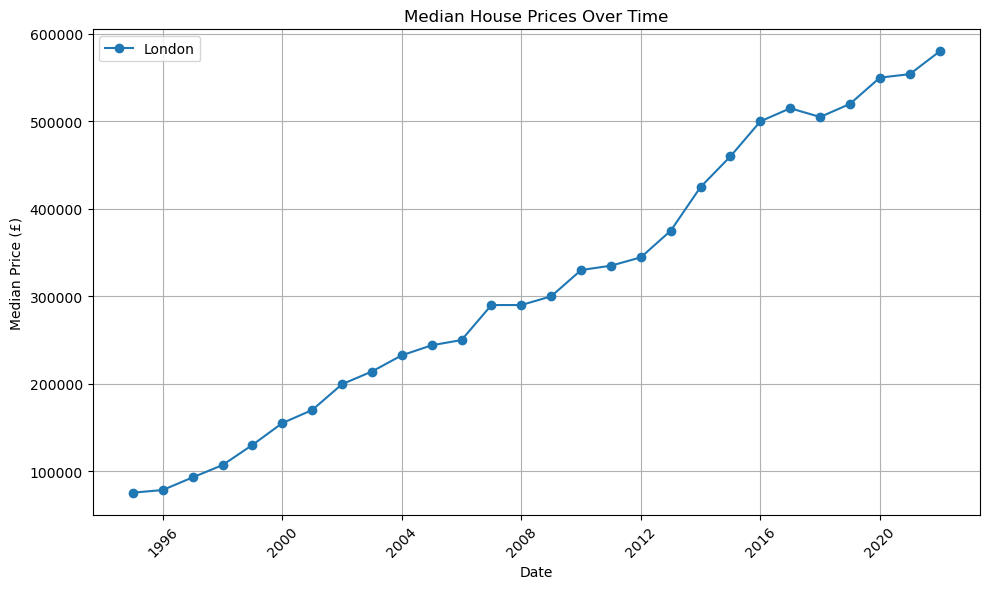

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the text file
df = pd.read_csv("median_price.txt", delimiter=" ", names=["City", "Date", "Count", "Median_Price"])

df['Date'] = pd.to_datetime(df['Date'])

fig, ax = plt.subplots(figsize=(10, 6))

city_data = {}
for city in df['City'].unique():
    city_data[city] = df[df['City'] == city]

for city, data in city_data.items():
    ax.plot(data['Date'], data['Median_Price'], label=city, marker='o')

ax.set_xlabel('Date')
ax.set_ylabel('Median Price (£)')
ax.set_title('Median House Prices Over Time')
ax.grid(True)
plt.xticks(rotation=45)

ax.legend()
plt.tight_layout()
plt.show()

In [2]:
def get_median(city_name, output_filename):
    
    import argparse
    import psycopg2
    import numpy as np
    
    args_list = ["--city", city_name, "-m"]
    
    def parse_arguments(arguments):
        parser = argparse.ArgumentParser(description='Return median house prices over time given some constraints.')
        parser.add_argument('--postcode', type=str, help='Postcode or initial fragment of a postcode')
        parser.add_argument('--paon', type=str, help='Primary addressable object name, e.g. house number')
        parser.add_argument('--town', type=str, dest='town_city', help='Town or city name')
        parser.add_argument('--city', type=str, dest='town_city', help='Town or city name')
        timeframe = parser.add_mutually_exclusive_group()
        timeframe.add_argument('-y', action='store_true', default=True, help='Calculate median within each year')
        timeframe.add_argument('-m', action='store_true', default=False, help='Calculate median within each month')

        return parser.parse_args(arguments)

    constraints = parse_arguments(args_list)

    sql_constraints = ['']
    if constraints.paon:
        sql_constraints.append("paon='{0:s}'".format(constraints.paon))
    if constraints.town_city:
        sql_constraints.append("town_city='{0:s}'".format(
                           constraints.town_city.upper()))
    if constraints.postcode:
        sql_constraints.append("postcode LIKE '{:s}%'".format(constraints.postcode))
    sql_constraints = ' AND '.join(sql_constraints)

    def increment_month(year, month):
        month += 1
        if month == 13:
            year, month = year + 1, 1
        return year, month

    def increment_year(year, month):
        year += 1
        return year, month

    if constraints.m:
        increment_time_interval = increment_year

    conn = psycopg2.connect(database='house_prices', user='postgres',
                            password='Kirt')
    cursor = conn.cursor()

    end_year, end_month = 2023, 1
    year1, month1 = 1995, 1

    with open(output_filename, "a") as output_file:
        while (year1, month1) != (end_year, end_month):
            year2, month2 = increment_time_interval(year1, month1)
            date_start = '{0:4d}-{1:02d}-01'.format(year1, month1)
            date_end = '{0:4d}-{1:02d}-01'.format(year2, month2)
            query = "SELECT price from pp WHERE date_of_transfer >= '{0:s}' AND"\
                    " date_of_transfer < '{1:s}'{2:s}".format(
                            date_start, date_end, sql_constraints)

            cursor.execute(query)
            prices = np.array(cursor.fetchall())
            median_price = np.median(prices)

            output_file.write('{0:s} {1:s} {2:d} {3:.2f}\n'.format(city_name, date_start, len(prices), median_price))
            print('{0:s} {1:s} {2:d} {3:.2f}'.format(city_name, date_start, len(prices), median_price))

            year1, month1 = year2, month2

In [74]:
#get_median("London", output_filename="median_price_london.txt")

In [5]:
output_filename = "test.txt" 

cities_to_analyze = ["London", "Liverpool", "Cambridge", "Manchester", "Newcastle", "Birmingham", "Cardiff"]

with open(output_filename, "w") as output_file:
    for city in cities_to_analyze:
        get_median(city, output_filename=output_filename)

London 1995-01-01 189957 75500.00
London 1996-01-01 183009 78500.00
London 1997-01-01 187756 93000.00
London 1998-01-01 179156 107000.00
London 1999-01-01 208924 130000.00
London 2000-01-01 166426 155000.00
London 2001-01-01 99003 170000.00
London 2002-01-01 103738 199497.00
London 2003-01-01 87195 214000.00
London 2004-01-01 93916 232500.00
London 2005-01-01 82954 244000.00
London 2006-01-01 103171 250000.00
London 2007-01-01 97774 290000.00
London 2008-01-01 47772 290000.00
London 2009-01-01 45068 300000.00
London 2010-01-01 56569 330000.00
London 2011-01-01 56072 335000.00
London 2012-01-01 58133 344500.00
London 2013-01-01 71182 375000.00
London 2014-01-01 78170 425000.00
London 2015-01-01 77195 460000.00
London 2016-01-01 73759 499999.00
London 2017-01-01 71012 515000.00
London 2018-01-01 67065 505000.00
London 2019-01-01 64471 520000.00
London 2020-01-01 58823 550000.00
London 2021-01-01 82016 554000.00
London 2022-01-01 62534 580000.00
Liverpool 1995-01-01 25374 42000.00
Liverpo

In [6]:
def get_graph(input_file):
    
    import pandas as pd
    import matplotlib.pyplot as plt

    # Read the data from the text file
    df = pd.read_csv(input_file, delimiter=" ", names=["City", "Date", "Count", "Median_Price"])

    df['Date'] = pd.to_datetime(df['Date'])

    fig, ax = plt.subplots(figsize=(10, 6))

    city_data = {}
    for city in df['City'].unique():
        city_data[city] = df[df['City'] == city]

    for city, data in city_data.items():
        ax.plot(data['Date'], data['Median_Price'], label=city, marker='o')

    ax.set_xlabel('Date')
    ax.set_ylabel('Median Price (£)')
    ax.set_title('Median House Prices Over Time')
    ax.grid(True)
    plt.xticks(rotation=45)

    ax.legend()
    plt.tight_layout()
    plt.show()

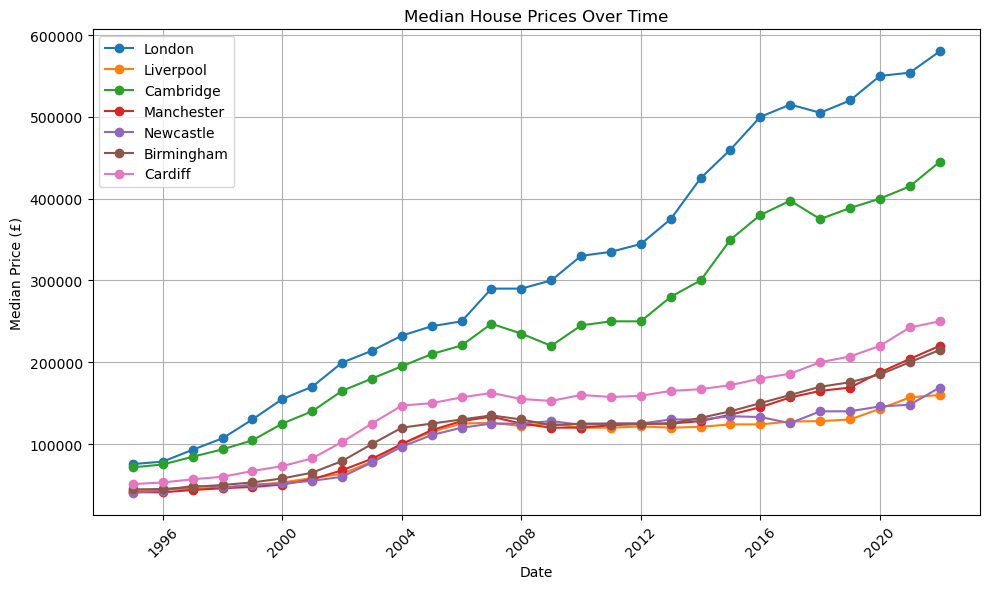

In [7]:
#input_file = "test.txt"

get_graph("test.txt")

In [19]:
conn = psycopg2.connect(database='house_prices', user='postgres', password='Kirt')
cursor = conn.cursor()

end_year, end_month = 2023, 1
year1, month1 = 1995, 1

query = 'SELECT DISTINCT postcode FROM pp'
cursor.execute(query)

postcodes = cursor.fetchall()

postcode_stubs = set([postcode[0][:2] for postcode in postcodes])

with open('postcode-stubs.txt', 'w') as fo:
    for postcode_stub in sorted(postcode_stubs):
        fo.write(postcode_stub + '\n')

In [20]:
conn = psycopg2.connect(database='house_prices', user='postgres', password='Kirt')
cursor = conn.cursor()

postcode_stubs = [line.strip() for line in open('postcode-stubs.txt')]
with open('postcode_medians.txt', 'w') as fo:
    for postcode_stub in postcode_stubs:
        query = "SELECT price from pp WHERE date_of_transfer > '2014-01-01'"\
                " AND date_of_transfer < '2015-01-01' AND postcode LIKE"\
                " '{:s}%'".format(postcode_stub)
        cursor.execute(query)
        prices = np.array(cursor.fetchall())
        median_price = np.median(prices)
        print(postcode_stub, median_price, file=fo)

In [18]:
import psycopg2
from psycopg2 import sql


conn = psycopg2.connect(database='house_prices', user='postgres', password='Kirt')


cur = conn.cursor()


query = sql.SQL("""
    SELECT EXTRACT(YEAR FROM date_of_transfer) AS year, COUNT(id) AS count
    FROM pp
    GROUP BY year
    ORDER BY year
""")

cur.execute(query)


results = cur.fetchall()


for year, count in results:
    print(f"Year: {year}, Count: {count}")
    
with open("id_counts_per_year.txt", "w") as file:
    for year, count in results:
        file.write(f"Year: {year}, Count: {count}\n")

print("Results written to id_counts_per_year.txt")


cur.close()
conn.close()

Year: 1995, Count: 2390748
Year: 1996, Count: 2133306
Year: 1997, Count: 2188594
Year: 1998, Count: 2100684
Year: 1999, Count: 2389428
Year: 2000, Count: 2027834
Year: 2001, Count: 1245677
Year: 2002, Count: 1351625
Year: 2003, Count: 1235287
Year: 2004, Count: 1231752
Year: 2005, Count: 1061282
Year: 2006, Count: 1325923
Year: 2007, Count: 1272170
Year: 2008, Count: 649557
Year: 2009, Count: 625220
Year: 2010, Count: 663214
Year: 2011, Count: 661137
Year: 2012, Count: 668829
Year: 2013, Count: 810903
Year: 2014, Count: 984694
Year: 2015, Count: 1010461
Year: 2016, Count: 1045489
Year: 2017, Count: 1066048
Year: 2018, Count: 1035622
Year: 2019, Count: 1008423
Year: 2020, Count: 885146
Year: 2021, Count: 1242597
Year: 2022, Count: 912337
Year: 2023, Count: 273139
Results written to id_counts_per_year.txt


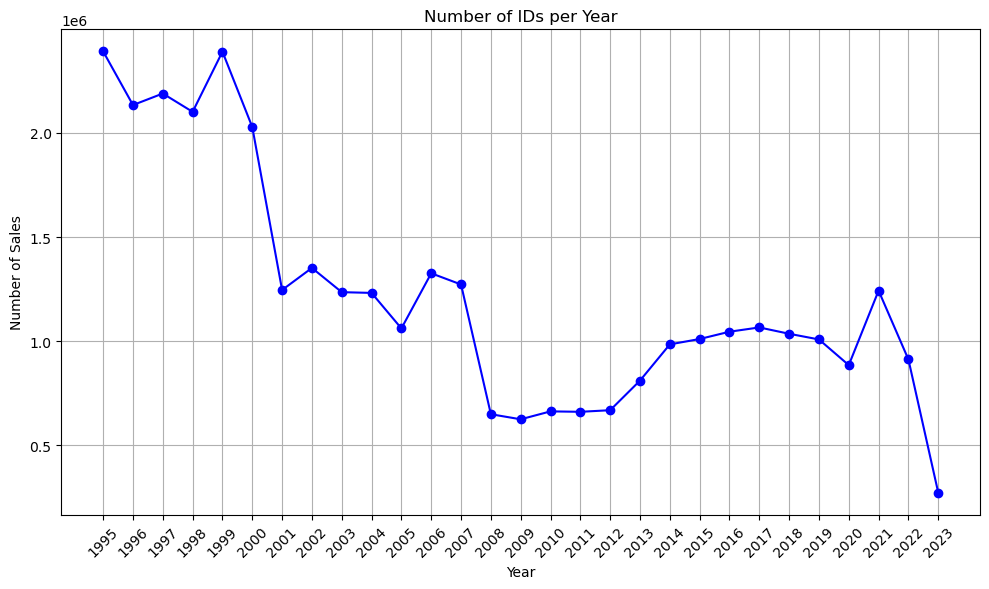

In [42]:
import matplotlib.pyplot as plt

years = []
counts = []

with open("id_counts_per_year.txt", "r") as file:
    for line in file:
        parts = line.strip().split(", ")
        year = int(parts[0].split(": ")[1])
        count = int(parts[1].split(": ")[1])
        years.append(year)
        counts.append(count)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.title('Number of IDs per Year')
plt.xticks(years, rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()
